## Problem 1 - Jakub Čejchan 96027923

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime


dhr = pd.read_csv('DHR.csv')
dpz = pd.read_csv('DPZ.csv')
gd = pd.read_csv('GD.csv')
qcom = pd.read_csv('QCOM.csv')
swk = pd.read_csv('SWK.csv')

companies = {'dhr':dhr,'dpz':dpz,'gd':gd,'qcom':qcom,'swk':swk}
companies

{'dhr':             Date     Open     High      Low    Close   Volume  Dividends  \
 0     2017-01-03   67.064   67.500   66.875   67.354  3205438      0.000   
 1     2017-01-04   67.311   68.209   67.243   67.782  3604411      0.000   
 2     2017-01-05   67.790   68.440   67.662   68.406  3822905      0.000   
 3     2017-01-06   68.389   69.013   68.166   68.765  2372861      0.000   
 4     2017-01-09   68.739   68.987   68.611   68.902  2614027      0.000   
 ...          ...      ...      ...      ...      ...      ...        ...   
 1505  2022-12-23  226.895  229.874  226.517  228.398  1236739      0.000   
 1506  2022-12-27  227.923  230.859  225.690  229.294  1275091      0.000   
 1507  2022-12-28  230.700  233.267  227.738  227.941  1558332      0.000   
 1508  2022-12-29  231.178  236.246  230.237  234.768  1357322      0.222   
 1509  2022-12-30  234.636  235.471  230.897  233.509  1701926      0.000   
 
       Stock Splits  
 0              0.0  
 1              0.0  
 

In [3]:
#1
for key, val in companies.items():
    if sum(val["High"] == val["Low"]) == val.shape[0]:
            print(f'the company {key} has no difference between High and Low')
    else:
            print(f'the company {key} has difference')

the company dhr has difference
the company dpz has difference
the company gd has difference
the company qcom has difference
the company swk has difference


In [4]:
#2
for key, val in companies.items():
        print(f'{key}: the highest High: {val['High'].max()}, the lowest High: {val['High'].min()}')
        

dhr: the highest High: 292.304, the lowest High: 67.5
dpz: the highest High: 547.527, the lowest High: 147.046
gd: the highest High: 245.975, the lowest High: 100.748
qcom: the highest High: 181.928, the lowest High: 41.757
swk: the highest High: 202.293, the lowest High: 68.092


In [5]:
#3
for key, val in companies.items(): 
    val['log_rts'] = np.log(val['Close']) - np.log(val['Close'].shift(1))
    print(f'{key}: \n min: {val['log_rts'].min()} \n max: {val['log_rts'].max()} \n mean: {val['log_rts'].mean()} \n stdev: {val['log_rts'].std()} \n skewness: {val['log_rts'].skew()}')


dhr: 
 min: -0.10230536000976809 
 max: 0.09256579418629052 
 mean: 0.000823895512213914 
 stdev: 0.015988137404463535 
 skewness: 0.05692384177365267
dpz: 
 min: -0.10625851237843076 
 max: 0.2279386439487201 
 mean: 0.0005562899013632948 
 stdev: 0.01962029162060119 
 skewness: 0.953049268551116
gd: 
 min: -0.11570271767898088 
 max: 0.08753067727864305 
 mean: 0.0003190904229037984 
 stdev: 0.015550125419817781 
 skewness: -0.5775930853112117
qcom: 
 min: -0.16186975682798188 
 max: 0.20869475283084427 
 mean: 0.0004625264826447417 
 stdev: 0.02474701731243326 
 skewness: 0.2908961172757011
swk: 
 min: -0.230415704901203 
 max: 0.22571674757510074 
 mean: -0.00020711253466322823 
 stdev: 0.02368157228862326 
 skewness: -0.938058657118408


In [6]:
#4
for key, val in companies.items(): 
    srtd =  val.sort_values(by='log_rts', ascending = False).reset_index()
    srtd2 = val.dropna()
    srtd2 =  val.sort_values(by='log_rts', ascending = True).reset_index()
    scnd_gain = srtd.loc[1,'Date']
    scnd_loss = srtd2.loc[1,'Date']
    print(f'{key} 2nd gain: {scnd_gain}, 2nd loss: {scnd_loss}')



dhr 2nd gain: 2022-07-21, 2nd loss: 2020-03-12
dpz 2nd gain: 2021-07-22, 2nd loss: 2020-03-16
gd 2nd gain: 2020-03-24, 2nd loss: 2020-03-16
qcom 2nd gain: 2020-07-30, 2nd loss: 2017-01-23
swk 2nd gain: 2020-04-06, 2nd loss: 2022-07-28


In [7]:
#5
for key, val in companies.items(): 
    avgw = val['Volume'].rolling(7).mean().median()
    print(f"the average calendar weekly volume for {key} was {avgw}")

the average calendar weekly volume for dhr was 2730130.6428571427
the average calendar weekly volume for dpz was 652521.4285714285
the average calendar weekly volume for gd was 1222992.8571428573
the average calendar weekly volume for qcom was 9805200.0
the average calendar weekly volume for swk was 1165771.4285714286


In [8]:
#8

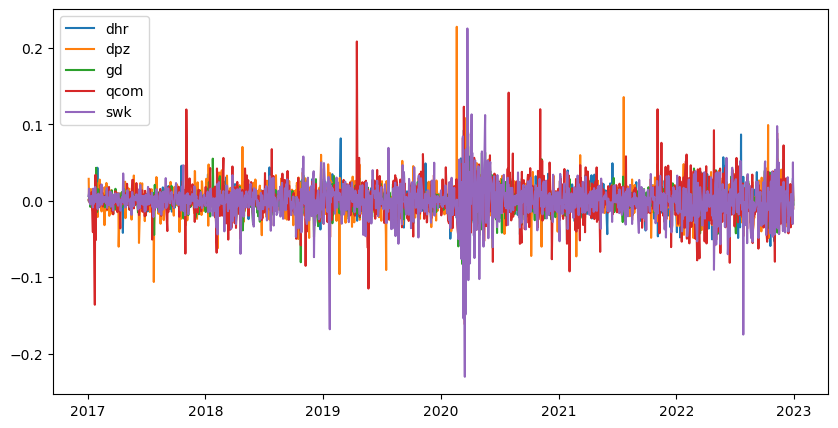

In [9]:
plt.subplots(1,1, figsize = (10,5))
for key, val in companies.items():
    val['Date'] = pd.to_datetime(val['Date'])
    plt.plot(val['Date'],val['log_rts'], label = key)
plt.legend()

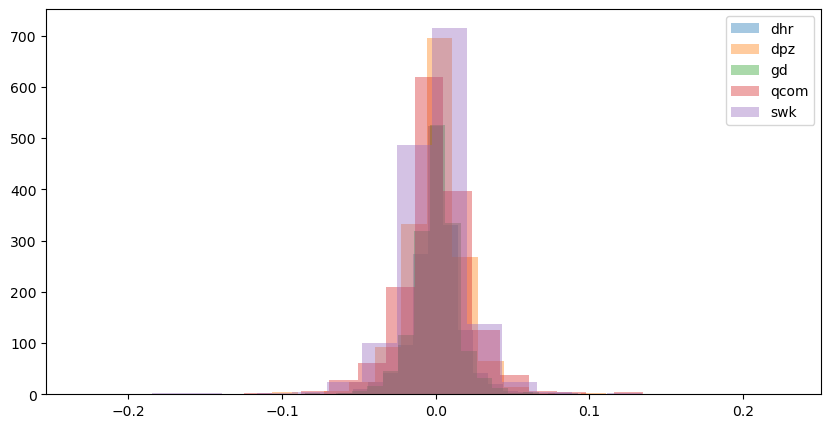

In [10]:
plt.subplots(1,1, figsize = (10,5))
for key, val in companies.items():
    plt.hist(val['log_rts'], label = key, bins= 20, alpha = 0.4)
plt.legend()

## Problem 2

In [12]:
import io
import requests

url = 'https://ies-fsv.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv'
zzz = requests.get(url).content
snp = pd.read_csv(io.StringIO(zzz.decode('utf-8')))
snp

,Symbol,Security,GICS_Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981
...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,"Louisville, Kentucky",06.10.1997,1997
499,ZBRA,Zebra Technologies,Information Technology,"Lincolnshire, Illinois",23.12.2019,1969
500,ZBH,Zimmer Biomet,Health Care,"Warsaw, Indiana",07.08.2001,1927
501,ZION,Zions Bancorporation,Financials,"Salt Lake City, Utah",22.06.2001,1873


In [13]:
#1 - 45
snp['included'].isnull().sum()
print(f'there are {snp['included'].isnull().sum()} that did not filled inclusion')

there are 45 that did not filled inclusion


In [14]:
#2
snp = snp.dropna(subset='included')
now = datetime.datetime.today()
year = now.year
old = snp.loc[snp['Founded'] == snp['Founded'].min(), 'Symbol']
yng = snp.loc[snp['Founded'] == snp['Founded'].max(), 'Symbol']
print(f'oldest: {old}')
print(f'youngest: {yng}')

oldest: 71    BK
Name: Symbol, dtype: object
youngest: 481    WBD
Name: Symbol, dtype: object


([<matplotlib.patches.Wedge at 0x2b93e2c0950>,
 [Text(0.9824937293546878, 0.4946777453845257, 'Information Technology'),
  Text(0.2025607676993733, 1.0811887602953707, 'Industrials'),
  Text(-0.6908833028272607, 0.8559674420645308, 'Health Care'),
  Text(-1.0941825695808445, 0.11298010632611698, 'Financials'),
  Text(-0.8881413728612144, -0.6490030060116807, 'Consumer Discretionary'),
  Text(-0.38408928255840796, -1.0307644847508899, 'Consumer Staples'),
  Text(0.08291962850581176, -1.0968702453838641, 'Real Estate'),
  Text(0.4879268426565808, -0.985863781774734, 'Materials'),
  Text(0.7857791165518135, -0.7697734601758179, 'Communication Services'),
  Text(0.9858637303813442, -0.48792694649771123, 'Utilities'),
  Text(1.0874987680638741, -0.16536755866721908, 'Energy')])

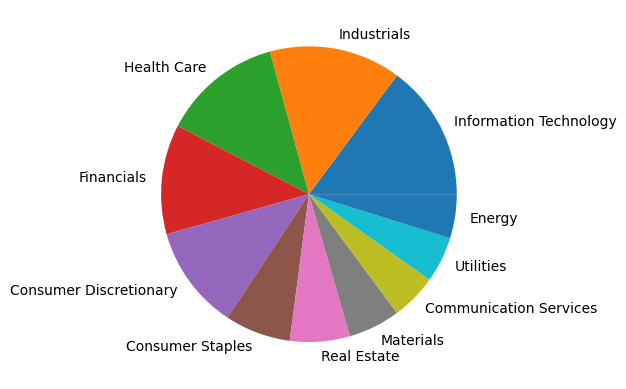

In [15]:
#3
industry = snp['GICS_Sector'].value_counts().reset_index()
plt.pie(industry['count'], labels = industry['GICS_Sector'])


In [16]:
#5
url2='https://ies-fsv.s3.eu-central-1.amazonaws.com/companies/companies_subindustry.csv'
zzz2 = requests.get(url2).content
snp2 = pd.read_csv(io.StringIO(zzz2.decode('utf-8')))

merged = snp.merge(snp2,on='Symbol')
merged

,Symbol,Security,GICS_Sector,hq,included,Founded,subindustry
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916,Building Products
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888,Health Care Equipment
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888),Pharmaceuticals
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981,Health Care Equipment
...,...,...,...,...,...,...,...
453,YUM,Yum! Brands,Consumer Discretionary,"Louisville, Kentucky",06.10.1997,1997,Restaurants
454,ZBRA,Zebra Technologies,Information Technology,"Lincolnshire, Illinois",23.12.2019,1969,Electronic Equipment & Instruments
455,ZBH,Zimmer Biomet,Health Care,"Warsaw, Indiana",07.08.2001,1927,Health Care Equipment
456,ZION,Zions Bancorporation,Financials,"Salt Lake City, Utah",22.06.2001,1873,Regional Banks


In [17]:
#Healthcare
hlth = merged[merged['GICS_Sector'] == 'Health Care']
hlth

,Symbol,Security,GICS_Sector,hq,included,Founded,subindustry
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888,Health Care Equipment
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888),Pharmaceuticals
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981,Health Care Equipment
13,A,Agilent Technologies,Health Care,"Santa Clara, California",05.06.2000,1999,Health Care Equipment
19,ALGN,Align Technology,Health Care,"Tempe, Arizona",19.06.2017,1997,Health Care Supplies
36,ABC,AmerisourceBergen,Health Care,"Conshohocken, Pennsylvania",30.08.2001,1985,Health Care Distributors
38,AMGN,Amgen,Health Care,"Thousand Oaks, California",02.01.1992,1980,Biotechnology
61,BAX,Baxter International,Health Care,"Deerfield, Illinois",30.09.1972,1931,Health Care Equipment
62,BDX,Becton Dickinson,Health Care,"Franklin Lakes, New Jersey",30.09.1972,1897,Health Care Equipment
66,BIO,Bio-Rad,Health Care,"Hercules, California",22.06.2020,1952,Life Sciences Tools & Services


([<matplotlib.patches.Wedge at 0x2b93fb4b800>,
 [Text(0.6465637441936395, 0.8899187180267095, 'Health Care Equipment'),
  Text(-0.7778175321297252, 0.7778173864806728, 'Pharmaceuticals'),
  Text(-1.0984924816721295, -0.057569676999322986, 'Biotechnology'),
  Text(-0.7778173682745392, -0.7778175503358549, 'Life Sciences Tools & Services'),
  Text(-0.17207777422027917, -1.0864571964046237, 'Managed Health Care'),
  Text(0.33991884563303326, -1.0461621185951564, 'Health Care Supplies'),
  Text(0.7360438034840479, -0.817459185129592, 'Health Care Distributors'),
  Text(0.9801072666129198, -0.49938937306730014, 'Health Care Services'),
  Text(1.0864572064740492, -0.1720777106443641, 'Health Care Facilities')])

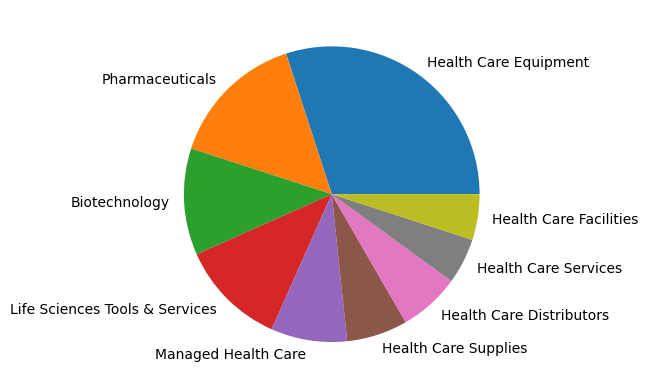

In [18]:
subin = hlth['subindustry'].value_counts().reset_index()
plt.pie(subin['count'], labels = subin['subindustry'])

## Part 3

In [20]:
import random
FV = np.random.randn(random.randrange(100, 500)) 

In [21]:
SV = np.random.standard_t(random.randrange(100, 500)) 